### 퍼셉트론

- 퍼셉트론은 다수의 신호(Input)을 입력받아서 하나의 신호(Output)을 출력한다 
- weight는 각각의 입력신호에 부여되어 입력신호와의 계산을 하고 신호의 총합이 정해진 임계값(θ; theta,세타)을 넘었을 때 1을 출력한다. 

(이를 뉴런의 활성화 activation 으로도 표현) 넘지 못하면 0 또는 -1을 출력한다)

- 요약하면, 가중치(weight)는 입력신호가 결과 출력에 주는 영향도를 조절하는 매개변수이고, 
- 편향(bias)은 뉴런(또는 노드; x를 의미)이 얼마나 쉽게 활성화(1로 출력; activation)되느냐를 조정하는(adjust) 매개변수이다.


### AND 게이트

- 퍼셉트론의 추론기만 사용

### 가중치와 편향으로 표현한 함수

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0 
    elif tmp > theta:
        return 1
    

In [2]:
AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

- theta를 -b로 바꾸고 수식 정리

In [3]:
import numpy as np 

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [4]:
AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

### NAND 게이트

In [5]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return 0
    else:
        return 1

In [6]:
NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1)

(1, 1, 1, 0)

### OR 게이트

In [7]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return 0
    else:
        return 1

In [8]:
OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1)

(0, 1, 1, 1)

### 퍼셉트론의 한계점

- 비선형 분류는 불가
- 다층 퍼셉트론을 만들면 이를 극복할 수 있다

### XOR 게이트

- 직선 하나로 나눈 영역만 표현할 수 있어 XOR과 같은 데이터 형태는 분류가 불가능하다는 한계가 있다.

In [9]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    
    return y

In [10]:
XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1)

(0, 1, 1, 0)

## 신경망

### sigmoid 함수 만들기

- 0과 1의 출력을 내고 싶다면 사용

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### 활성화 함수는 비선형이 주로 사용됨
 
 - 함수의 합성에서 선형함수를 사용하면 합성의 의미가 없음
 - 다시 말해 선형함수를 여러층으로 구성한다 하더라도 이는 선형함수를 세번 연속 반복한 것에 지나지 않는다는 의미와 같기 때문이다


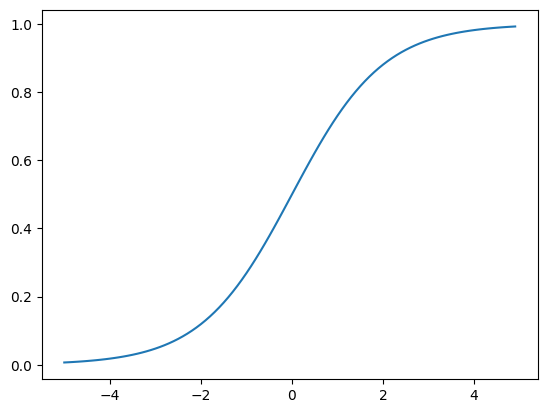

In [12]:
import matplotlib.pyplot as plt 
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### 활성화 함수 relu

In [13]:
def relu(x):
    return  np.maximum(0, x)

### 신경망은 행렬의 곱 연산이 많이 사용됨

In [14]:
X = np.array([1, 2])
W = np.array( [[1, 3, 5], [2, 4, 6]])

X.shape , W.shape

((2,), (2, 3))

In [15]:
np.dot(X, W)

array([ 5, 11, 17])

### 활성화함수

In [16]:
X = np.array([1.0 , 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([[0.1, 0.2, 0.3]])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)

print(A1)
print(Z1)

(2, 3)
(2,)
(1, 3)
[[0.3 0.7 1.1]]
[[0.57444252 0.66818777 0.75026011]]


### 1층 - 2층

In [17]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(1, 3)
(3, 2)
(2,)


### 2층 - 3층 출력층

In [18]:
def identify_function(x):
    return x 

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)

### 모델의 가중치

In [19]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

### 모델의 forward 연산

- np.dot() : 벡터 내적

In [20]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3 
    y = identify_function(a3)
    
    return y

### 추론

In [21]:
network = init_network()
x = np.array([1.0, 0.5])
y =forward(network, x)
y

array([0.31682708, 0.69627909])

### softmax 함수를 코드로 구현

In [22]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

In [23]:
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

### exp의 overflow 문제

In [24]:
np.exp(10), np.exp(100), np.exp(1000)

/tmp/ipykernel_24821/1145674931.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(10), np.exp(100), np.exp(1000)


(22026.465794806718, 2.6881171418161356e+43, inf)

In [25]:
softmax([10,100,1000])

/tmp/ipykernel_24821/675541793.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(a) / np.sum(np.exp(a))
/tmp/ipykernel_24821/675541793.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(a) / np.sum(np.exp(a))


array([ 0.,  0., nan])

### exponential 함수 에러 극복 (값이 크게 나오므로 overflow 문제)

In [26]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    
    return exp_a / np.sum(exp_a)

In [27]:
softmax([10, 100, 1000])

array([0., 0., 1.])

### MNIST 

- one hot encoding
- batch size
    - 높을수록 빠르게 학습
    - but, 메모리 문제가 발생할 수도

In [28]:
import pandas as pd 

df_train = pd.read_csv('/home/kkyu/amr_ws/DL/data/mnist_train.csv')
df_test = pd.read_csv('/home/kkyu/amr_ws/DL/data/mnist_test.csv')

df_train.shape, df_test.shape

/tmp/ipykernel_24821/3523987432.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


((60000, 785), (10000, 785))

In [29]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

### 이미지를 그려주는 함수

In [30]:
from PIL import Image 

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [31]:
img = X_train[0]
label = y_train[0]


img = img.reshape(28, 28)

img_show(img)

- pickle 모듈을 이용하면 원하는 데이터를 자료형의 변경없이 파일로 저장하여 그대로 로드할 수 있다.

In [32]:
import pickle 

def init_network():
    with open("/home/kkyu/amr_ws/DL/data/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


In [33]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1 
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y



In [34]:
network = init_network()
accuracy_cnt = 0

for i in range(len(X_train)):
    y_pred = predict(network, X_train[i])
    p = np.argmax(y_pred)
    if p == y_train[i]:
        accuracy_cnt += 1
        
print("Accuracy : " +str(float(accuracy_cnt) / len(X_train)))

/tmp/ipykernel_24821/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy : 0.9251833333333334


### 배치 사이즈 설정

In [35]:
batch_size = 100 
accuracy_cnt = 0

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i : i+batch_size]
    y_batch = predict(network, X_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == y_train[i : i+batch_size])
    

print("Accuracy : " +str(float(accuracy_cnt) / len(X_train)))

/tmp/ipykernel_24821/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy : 0.9251833333333334


In [36]:
import numpy as np 

X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0], [0], [0], [1]])

In [37]:
def sigmoid(x):
    return 1. /(1. + np.exp(-x))

### 순방향 연산 함수

In [38]:
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)
    
    return y 

### 에러를 이용한 기울기를 계산하는 함수

In [39]:
def calc_error(d, y):
    e = d - y 
    delta = y*(1-y)*e
    
    return delta

### 그래디언트 디센트를 계산하는 함수

In [40]:
def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y = calc_output(W, x)
        delta = calc_error(d, y)
        
        dW = alpha*delta*x
        W = W + dW 
        
    
    return W, delta

### 학습

In [41]:
W = 2*np.random.random((1,3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000):
    W, delta = delta_GD(W, X, D, alpha)
    
    hist_loss.append(delta)
    hist_W.append(W)
    
    if epoch % 100 == 0:
        print(W)

[[-0.78749534  0.7170478  -0.21282651]]
[[ 2.61638561  2.58437729 -3.96129843]]
[[ 3.45204163  3.43292008 -5.238285  ]]
[[ 3.9491827   3.93639357 -5.99423793]]
[[ 4.29949064  4.28999333 -6.52481593]]
[[ 4.56848799  4.56097188 -6.93126504]]
[[ 4.78614537  4.77994345 -7.25962662]]
[[ 4.96856864  4.96329874 -7.53453405]]
[[ 5.12537255  5.12079643 -7.7706458 ]]
[[ 5.26274037  5.25869995 -7.97736627]]


### epoch당 loss의 변화

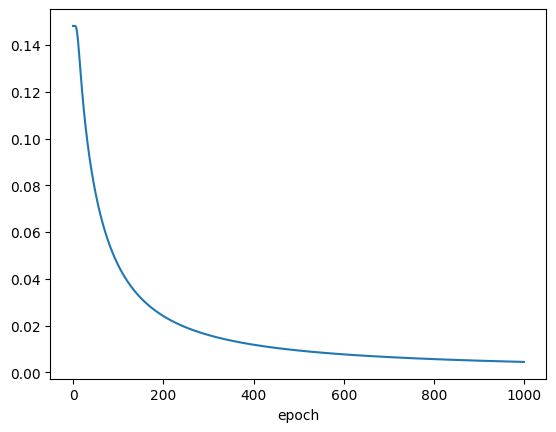

In [42]:
import matplotlib.pyplot as plt 

plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show()

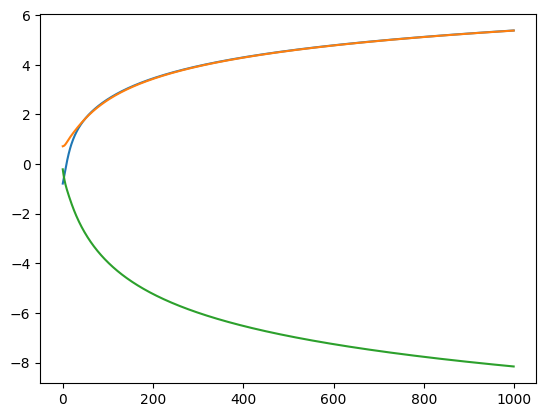

In [43]:
plt.plot(np.array(hist_W).reshape(-1,3))

In [44]:
N = 4
for k in range(N):
    x = X[k, :].T
    y = calc_output(W, x)
    
    print(y)

[0.00028597]
[0.05845652]
[0.058656]
[0.93114947]


In [45]:
def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1) 
    v = np.matmul(W2, y1)
    y = sigmoid(v) 
    
    return y, y1


In [46]:
def calc_delta(d, y):
    e = d - y 
    delta = y * (1-y) * e
    
    return delta 

In [47]:
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1) * e1 
    
    return delta1

In [48]:
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)
        
        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1 
        
        dW2 = alpha * delta * y1 
        W2 = W2 + dW2
        
    return W1, W2

In [49]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0], [1], [1], [0]])

W1 = 2*np.random.random((4, 3)) - 1
W2 = 2*np.random.random((1, 4)) - 1

In [50]:
alpha = 0.9 

for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)
    

In [51]:
N = 4

for k in range(4):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[0.0099812]
[0.98825623]
[0.98969382]
[0.01433888]
